In [1]:
import pandas as pd

In [2]:
baton = pd.read_csv('Baton_Rouge_Traffic_Incidents(1).csv')

### Removed unnecessary columns

In [4]:
baton.drop(axis=1, columns=['LONGITUDE'], inplace=True)
baton.drop(axis=1, columns=['LATITUDE'], inplace=True)
baton.drop(axis=1, columns=['GEOLOCATION'], inplace=True)

In [5]:
baton.drop(axis=1, columns=['CRASH DATE'], inplace=True)
baton.drop(axis=1, columns=['SUBZONE'], inplace=True)
baton.drop(axis=1, columns=['ZONE'], inplace=True)

In [6]:
baton.drop(axis=1, columns=['ZIP CODE'], inplace=True)
baton.drop(axis=1, columns=['DISTRICT'], inplace=True)
baton.drop(axis=1, columns=['ALIGNMENT'], inplace=True)

### Removed the cities that were not 'Baton Rouge'

In [7]:
baton = baton[baton["CITY"] == "BATON ROUGE"]
baton['CITY'].value_counts()

BATON ROUGE    18732
Name: CITY, dtype: int64

### Removed states that were not 'LA'

In [8]:
baton = baton[baton["STATE"] == "LA"]
baton['STATE'].value_counts()

LA    17064
Name: STATE, dtype: int64

In [172]:
baton['STREET ADDRESS'].value_counts()

I-10 W                               181
I-10 E                               163
I-12 W                               160
I-12 E                               121
AIRLINE HWY                          110
                                    ... 
727 WEST INTERSTATE 12                 1
9000AIRLINE HWY                        1
4000 TUSCARORA ST                      1
10606 N MALL WAL-MART PARKING LOT      1
2248 PLANK RD                          1
Name: STREET ADDRESS, Length: 8847, dtype: int64

### adding a count column for the count of total accidents on roads

In [70]:
baton['count'] = baton.groupby('STREET ADDRESS')['STREET ADDRESS'].transform('count')
baton.tail()

,INCIDENT NUMBER,STREET ADDRESS,CITY,STATE,TOTAL VEHICLES,ROAD CLASS,HIT AND RUN,TRAIN,FATALITY,INJURY,...,ROADWAY CONDITION,ROADWAY DESIGN,PRIMARY FACTOR,SECONDARY FACTOR,WEATHER,LOCATION TYPE,ROADWAY RELATION,ACCESS CONTROL,LIGHTING,count
20927,21-017794,3260 HIGHLAND RD,BATON ROUGE,LA,2,CITY STREET,False,False,False,False,...,NO ABNORMALITIES,TWO-WAY ROAD WITH NO PHYSICAL SEPARATION,VIOLATIONS,MOVEMENT PRIOR TO CRASH,CLEAR,BUSINESS CONTINUOUS,ON ROADWAY,NO CONTROL (UNLIMITED ACCESS TO ROADWAY),DAYLIGHT,5.0
20928,21-046501,11220 N HARRELLS FERRY RD,BATON ROUGE,LA,1,OFF ROAD / PRIVATE PROPERTY,False,False,False,False,...,NO ABNORMALITIES,TWO-WAY ROAD WITH NO PHYSICAL SEPARATION,VIOLATIONS,NaN,CLEAR,BUSINESS CONTINUOUS,ON ROADWAY,NO CONTROL (UNLIMITED ACCESS TO ROADWAY),DAYLIGHT,1.0
20929,22-048756,1100 W LEE DR,BATON ROUGE,LA,2,CITY STREET,False,False,False,False,...,NO ABNORMALITIES,TWO-WAY ROAD WITH A PHYSICAL BARRIER,VIOLATIONS,MOVEMENT PRIOR TO CRASH,CLEAR,"BUSINESS, MIXED RESIDENTIAL",ON ROADWAY,NO CONTROL (UNLIMITED ACCESS TO ROADWAY),DARK - CONTINUOUS STREET LIGHT,4.0
20930,21-048625,2248 PLANK RD,BATON ROUGE,LA,3,STATE HWY,False,False,False,True,...,NO ABNORMALITIES,TWO-WAY ROAD WITH NO PHYSICAL SEPARATION,VIOLATIONS,NaN,CLOUDY,"BUSINESS, MIXED RESIDENTIAL",ON ROADWAY,NO CONTROL (UNLIMITED ACCESS TO ROADWAY),DAYLIGHT,1.0
20931,21-065435,3705 WINBOURNE AVE,BATON ROUGE,LA,2,CITY STREET,True,False,False,False,...,NO ABNORMALITIES,TWO-WAY ROAD WITH NO PHYSICAL SEPARATION,VIOLATIONS,NaN,CLEAR,RESIDENTIAL DISTRICT,ON ROADWAY,NO CONTROL (UNLIMITED ACCESS TO ROADWAY),DARK - STREET LIGHT AT INTERSECTION ONLY,2.0


In [79]:
import matplotlib.pyplot as plt
import numpy as np

## Where the most accidents occur

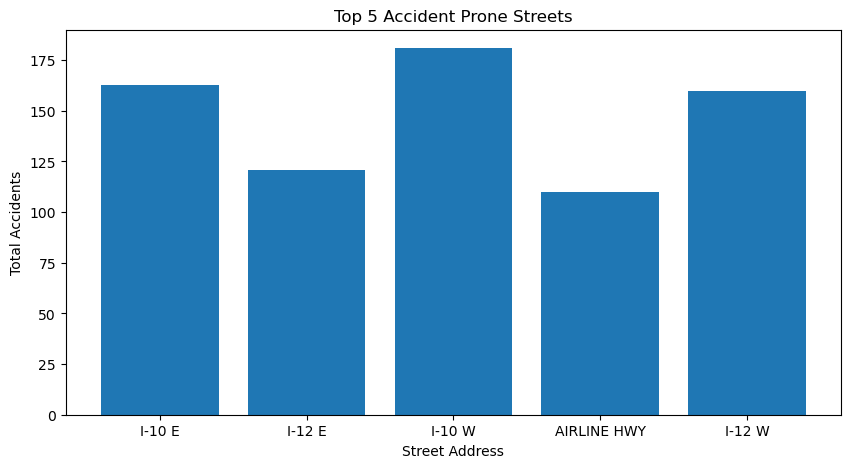

In [89]:
baton_head = baton['STREET ADDRESS'].value_counts().nlargest(5).index.tolist()

# Create a new DataFrame with only the top 5 metrics of Street Address
baton_top = baton[baton['STREET ADDRESS'].isin(baton_head)]

# Create a bar chart of the top 5 metrics
plt.figure(figsize=(10, 5))
plt.bar(baton_top['STREET ADDRESS'], baton_top['count'])
plt.xlabel('Street Address')
plt.ylabel('Total Accidents')
plt.title('Top 5 Accident Prone Streets')
plt.show()

In [94]:
baton['MANNER OF COLLISION'].value_counts()

REAR END                            6126
SIDESWIPE SAME                      3109
OTHER                               2387
RIGHT ANGLE                         2264
LEFT TURN                           1295
NON-COLLISION WITH MOTOR VEHICLE    1019
RIGHT TURN                           348
SIDESWIPE OPPOSITE                   276
HEAD-ON                              208
Name: MANNER OF COLLISION, dtype: int64

## Adding up the manners of collision that could be prevented with a barrier

In [190]:
(348+276+208)/17063 * 100

4.876047588349059

### recreating a different count column to collect the total amount of accidents of a certain type

In [107]:
baton['count'] = baton.groupby('MANNER OF COLLISION')['MANNER OF COLLISION'].transform('count')

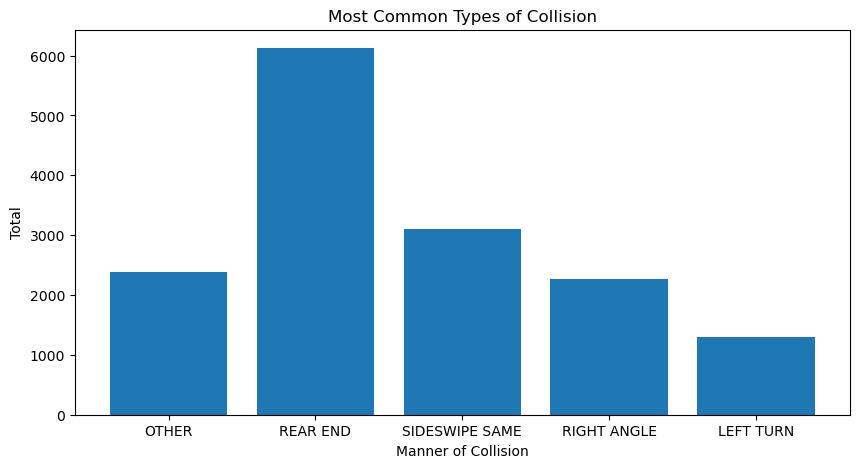

In [106]:
baton_manner = baton['MANNER OF COLLISION'].value_counts().nlargest(5).index.tolist()

# Create a new DataFrame with only the top 5 metrics
baton_court = baton[baton['MANNER OF COLLISION'].isin(baton_manner)]

# Create a bar chart of the top 5 metrics
plt.figure(figsize=(10, 5))
plt.bar(baton_court['MANNER OF COLLISION'], baton_court['count'])
plt.xlabel('Manner of Collision')
plt.ylabel('Total')
plt.title('Most Common Types of Collision')
plt.show()

In [108]:
from matplotlib import pyplot as plt

import seaborn as sns

## For these next donut plots, I am just dividing each number by the total amount, 17,063. I am also compiling the lesser columns into the 'other' category

In [140]:
baton['ROADWAY SURFACE'].value_counts()

DRY                                     14751
WET                                      2168
UNKNOWN                                   119
ICE                                        15
SNOW / SLUSH                                5
CONTAMINANT (SAND,MUD,DIRT,OIL,ETC.)        5
Name: ROADWAY SURFACE, dtype: int64

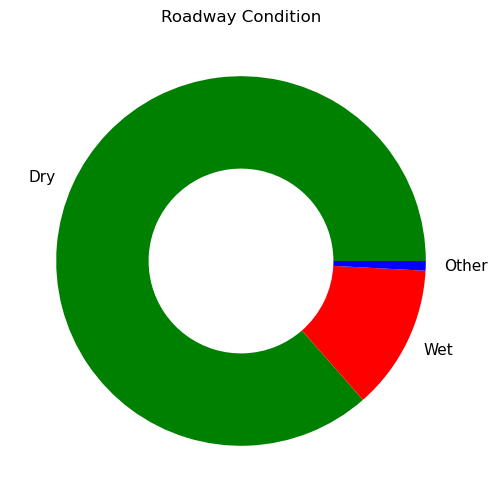

In [143]:
dry = 86.5
wet = 12.7
other = 0.84
labels = ['Dry', 'Wet', 'Other']
values = [dry, wet, other]


fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red', 'blue'])
ax.set_title('Roadway Condition')

plt.show()

In [148]:
baton['PRIMARY FACTOR'].value_counts()

VIOLATIONS                 13546
MOVEMENT PRIOR TO CRASH     2683
CONDITION OF DRIVER          337
VEHICLE CONDITIONS           139
WEATHER                       75
ROADWAY CONDITION             70
VISION OBSCUREMENTS           60
PEDESTRIAN ACTIONS            54
ROAD SURFACE                  38
TRAFFIC CONTROL               25
KIND OF LOCATION              22
LIGHTING                      10
CONDITION OF PEDESTRIAN        3
Name: PRIMARY FACTOR, dtype: int64

## A violation is speeding, running a red light/stop sign, turning without a signal 

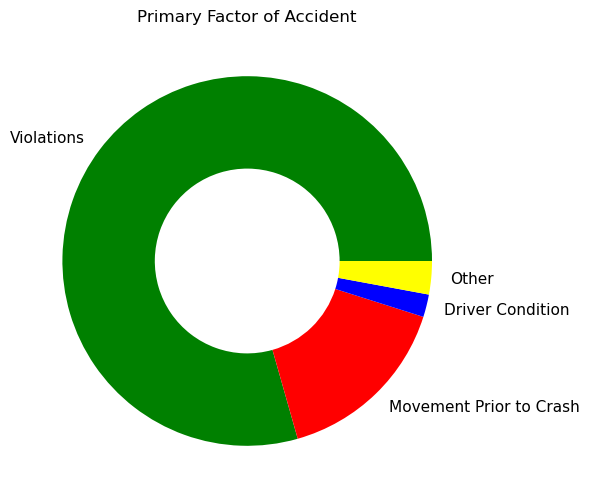

In [187]:
violations = 79.4
movement = 15.7
driver = 1.98
other = 2.91
labels = ['Violations', 'Movement Prior to Crash', 'Driver Condition', 'Other']
values = [violations, movement, driver, other]


fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red', 'blue', 'yellow'])
ax.set_title('Primary Factor of Accident')

plt.show()

In [156]:
baton['WEATHER'].value_counts()

CLEAR           13209
CLOUDY           2299
RAIN             1381
UNKNOWN           138
FOG / SMOKE        16
SLEET / HAIL       13
OTHER               4
SNOW                3
Name: WEATHER, dtype: int64

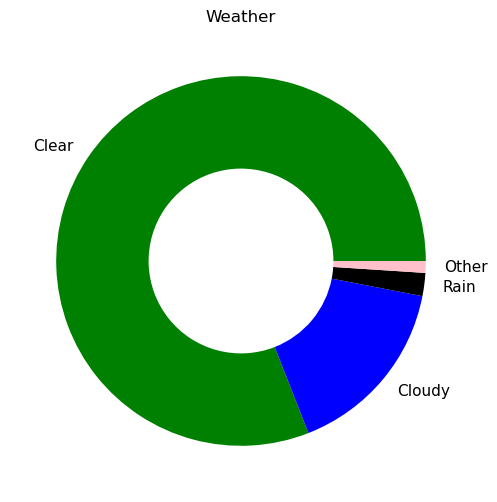

In [160]:
clear = 77.4
cloudy = 13.5
rain = 8.09
other = 1.01
labels = ['Clear', 'Cloudy', 'Rain', 'Other']
values = [violations, movement, driver, other]


fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'blue', 'black', 'pink'])
ax.set_title('Weather')

plt.show()

In [168]:
baton['ROADWAY DESIGN'].value_counts()

TWO-WAY ROAD WITH NO PHYSICAL SEPARATION    7638
TWO-WAY ROAD WITH PHYSICAL SEPARATION       4744
ONE-WAY ROAD                                1949
TWO-WAY ROAD WITH A PHYSICAL BARRIER        1340
OTHER                                       1291
UNKNOWN                                       89
Name: ROADWAY DESIGN, dtype: int64

### "No physical separation", just a yellow line separating the two lanes. "With Physical Separation" means there is a median between the lanes. "With physical barrier" means there is a concrete barrier between the lanes

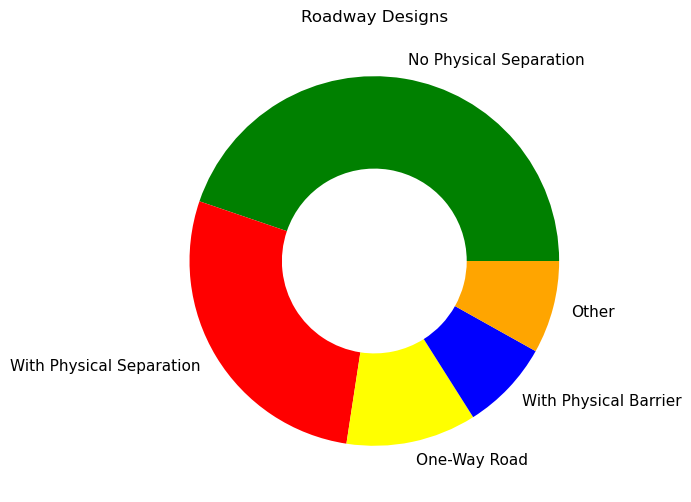

In [183]:
no = 43.6
withp = 27.1
one = 11.1
barrier = 7.7
other = 7.9
labels = ['No Physical Separation', 'With Physical Separation', 'One-Way Road', 'With Physical Barrier', 'Other']
values = [no, withp, one, barrier, other]


fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red', 'yellow', 'blue', 'orange'])
ax.set_title('Roadway Designs')

plt.show()

## Other statistics

In [184]:
baton['TOTAL VEHICLES'].value_counts()

2    14314
1     1483
3     1074
4      164
5       22
6        6
7        1
Name: TOTAL VEHICLES, dtype: int64

In [185]:
baton['FATALITY'].value_counts()

False    17035
True        29
Name: FATALITY, dtype: int64

In [186]:
baton['INJURY'].value_counts()

False    15857
True      1207
Name: INJURY, dtype: int64

In [191]:
baton['ROADWAY CONDITION'].value_counts()

NO ABNORMALITIES              16668
WATER ON ROADWAY                120
OTHER                            76
CONSTRUCTION, REPAIR             60
SHOULDER ABNORMALITY             54
OBJECT IN ROADWAY                30
BUMPS                            14
HOLES                            13
LOOSE SURFACE MATERIAL           13
PREVIOUS CRASH                    5
DEEP RUTS                         4
OVERHEAD CLEARANCE LIMITED        3
CONSTRUCTION - NO WARNING         2
Name: ROADWAY CONDITION, dtype: int64

In [192]:
baton['INTERSECTION'].value_counts()

False    10812
True      6252
Name: INTERSECTION, dtype: int64

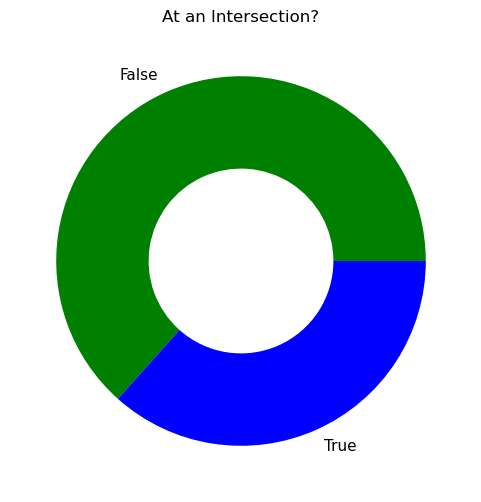

In [200]:
false = 63.4
true = 36.6

labels = ['False', 'True']
values = [false, true]


fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'blue'])
ax.set_title('At an Intersection?')

plt.show()

In [193]:
baton['HIT AND RUN'].value_counts()

False    12855
True      4209
Name: HIT AND RUN, dtype: int64

In [202]:
baton['ROAD CLASS'].value_counts()

CITY STREET                    8691
INTERSTATE                     2886
STATE HWY                      2231
OFF ROAD / PRIVATE PROPERTY    1635
U.S. HWY                       1394
PARISH ROAD                     221
TOLL ROAD                         2
Name: ROAD CLASS, dtype: int64

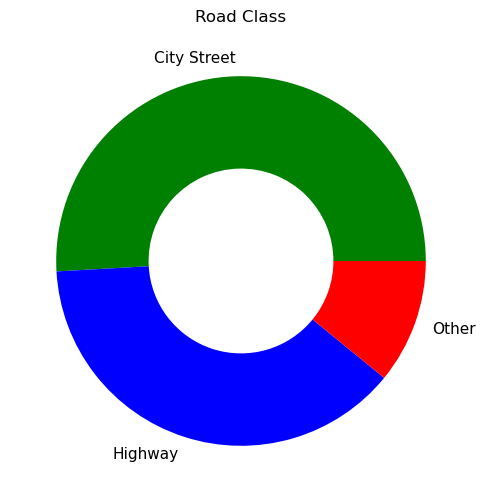

In [204]:
city = 50.9
high = 38.2
other = 10.9

labels = ['City Street', 'Highway', 'Other']
values = [city, high, other]


fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'blue', 'red'])
ax.set_title('Road Class')

plt.show()

In [205]:
baton['ROADWAY RELATION'].value_counts()

ON ROADWAY                 14717
OTHER                       1433
SHOULDER                     359
BEYOND SHOULDER - RIGHT      239
BEYOND SHOULDER - LEFT        89
UNKNOWN                       80
BEYOND RIGHT OF WAY           74
MEDIAN                        41
GORE                          23
Name: ROADWAY RELATION, dtype: int64

In [206]:
baton['LIGHTING'].value_counts()

DAYLIGHT                                    12202
DARK - CONTINUOUS STREET LIGHT               3775
DARK - STREET LIGHT AT INTERSECTION ONLY      375
DARK - NO STREET LIGHTS                       256
UNKNOWN                                       190
DUSK                                          125
DAWN                                          101
OTHER                                          36
Name: LIGHTING, dtype: int64